# Лабораторная работа 

# "Центральная предельная теорема своими руками"

Для начала подключим все необходимые библиотеки. Во-первых, нам понадобится модуль scipy.stats для работы с распределениями и их характеристиками. Во-вторых, нам понадобится библиотека numpy для удобной работы с распределениями и выборками. Для построения графиков будем использовать matplotlib, а для математических вычислений будем использовать модуль math. Все модули, кроме math импортируем с псевдонимами для более удобной работы:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline # Магия для рисования прямо в ноутбуке

Для данной лабораторной работы мною было выбрано распределение Гомпертца. Это довольно популярное распределение, которое описывает смертность человека и большинства многоплодных животных. Согласно закону Гомпертца — Мейкхама, смертность является суммой независимого от возраста компонента (члена Мейкхама) и компонента, зависимого от возраста (функция Гомпертца), который экспоненциально возрастает с возрастом и описывает старение организма. В защищённых средах, где внешние причины смерти отсутствуют (в лабораторных условиях, в зоопарках или для людей в развитых странах) независимый от возраста компонент часто становится малым, и формула упрощается до функции Гомпертца. Распределение было получено и опубликовано актуарием и математиком Бенджамином Гомпертцем в 1832 году. (Ист.  https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%93%D0%BE%D0%BC%D0%BF%D0%B5%D1%80%D1%82%D1%86%D0%B0)

## Задание 1

Сгенерируем из распределения Гомпертца выборку объёма 1000. В качестве параметра распределения возьмем 0,5. 

In [14]:
c = 0.5  # Значение параметра
gompertz_distr = sts.gompertz  # Взяли распределение из scipy
sample1 = gompertz_distr.rvs(c, size=1000) # Сгенерировали выборку объемом 1000

Далее покажем теоретическую плотность распределения и гистограмму данной выборки. 

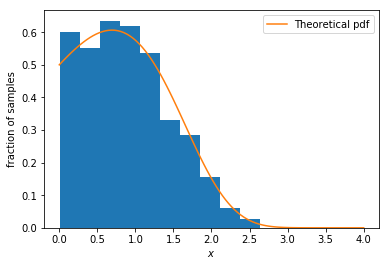

In [21]:
plt.hist(sample1, normed=True) # cначала строим гистограмму. 
plt.ylabel('fraction of samples') # подписываем оси x и y
plt.xlabel('$x$')

x = np.linspace(0,4,100) # обозначаем пространство для построения графика теоретической плотности распределения
pdf = gompertz_distr.pdf(x, c) # Берем функцию плотности распределения с конкретным параметром c
plt.plot(x,pdf, label = "Theoretical pdf") # cтроим данную функцию
plt.legend(loc='upper right') # Выводим подписи

Как видим, гистограмма довольно близка к теоретической плотности. Данное распределение не очень похоже на нормальное, так как оно "скошено", но "скос" не слишком сильный, поэтому это удачный выбор для ЦПТ своими руками

## Задание 2

Оценим распределение выборочного среднего нашей случайной величины при разных объёмах выборок. Для этого сгенерирем 1000 выборок объёма n для нескольких различных n и построим гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения, посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Выполним расчет и построения для различных n: 5, 10, 25, 50, 100.  

Так как мы делаем одно и то же для большого количества значений параметра n, то целесообразно написать функцию для этого.

In [23]:
def graph_for_n(n):
    mean, var = sts.gompertz.stats(c, moments='mv') # Находим мат.ожидание и дисперсию для распределения Гомпертца по пар-ру.
    norm_rv = sts.norm(mean,math.sqrt(var/n)) # задаем параметры нормального распределения для заданного n согласно ЦПТ
    pdf = norm_rv.pdf(x) # находим плотность распределения
    plt.plot(x,pdf, label = "Theoretical pdf") # Строим ее 
    samples1 = np.zeros(1000)  #далее оцениваем распределение выборочных средних
    # Сделаем всё одной строкой как True питонисты. Для этого по массиву в 1000 элементов делаем следующее:
    # При помощи rvs(c, size=n) генерируем выборку из распред. Гомпертца с параметром с объема n. Затем находим средние
    # При помощи mean(). Благодаря mapу сразу получаем массив  выбборочных средних. Удобно ;-D 
    samples1 = map(lambda x: gompertz_distr.rvs(c, size=n).mean(), samples1)
    plt.hist(samples1, normed=True) # Строим гистограмму
    plt.ylabel('fraction of samples') # не забываем подписать Оси
    plt.xlabel('$x$') 
    plt.legend(loc='upper right') # Выводим подписи

А теперь при помощи нашей удобной функции проведем эксперименты с различными n: 5, 10, 25, 50, 100

Для n = 5

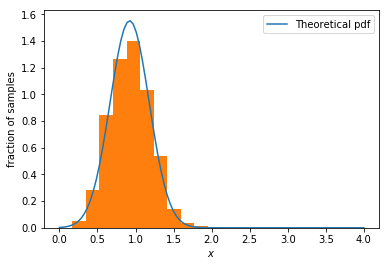

In [24]:
graph_for_n(5)

Для n = 10

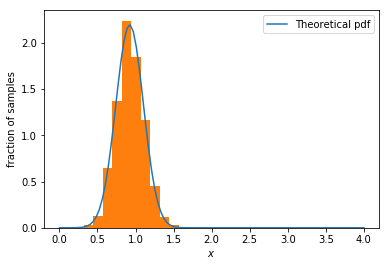

In [25]:
graph_for_n(10)

Для n = 25

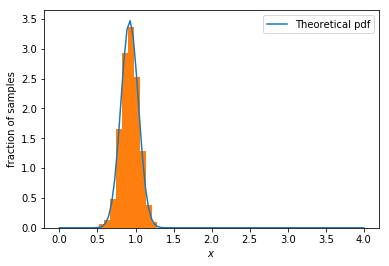

In [26]:
graph_for_n(25)

Для n = 50

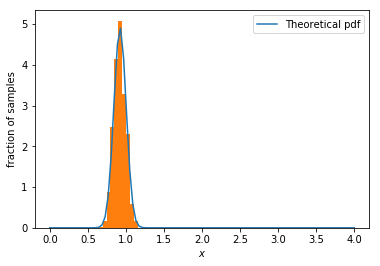

In [27]:
graph_for_n(50)

Для n = 100

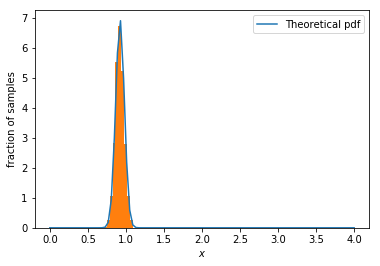

In [28]:
graph_for_n(100)

# Выводы

Сначала посмотрим на сами распределения при различных значениях n. Мы видим явное уменьшение разброса: чем больше выборки, тем их выборочные средние ближе к мат. ожиданию. С увеличением n не происходит смещения "колокола" нормального распределения, однако происходит его резкое сужение. 

Точность аппроксимации выборочных средних нормальным распределением растет с увеличением n. Хотя в данном случае, что было для меня неожиданно, гистограмма, довольно "хорошо лежащая" под нормальным распределением получилась даже при n = 5. В дальнейшем точность аппроксимации только возрастала. 